# Python para Máquinas de Vectóres de Soporte:

Importe de librerías y clases necesarias:

In [1]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from random import sample
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

Se definen funciones que permitan manejar de manera más sencillas las gráficas y las métricas:

In [2]:
def plot_model(X,y,clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='black')
    plt.xlabel('Petal widtt'); plt.ylabel('Petal length')
    plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())
    plt.xticks(()); plt.yticks(());
    plt.title('Gráfica resultante')

    plt.show()
def confusion_matrix_plot(yTest,Predict):
    confusion_mat_svm=confusion_matrix(yTest,Predict)
    df_svm = pd.DataFrame(confusion_mat_svm, index = [i for i in ['Setosa','Virginica','Virsicolor']],
                      columns = [i for i in ['Setosa','Virginica','Virsicolor']])
    plt.figure(figsize = (7,4))
    sn.heatmap(df_svm, annot=True); plt.show()
def tune_function(X,y,kernel,defaultNum=0):
    param_grid = {'C': [0.001, 0.01 ,0.1, 1, 10, 100], 
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': [kernel]} 
    grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = defaultNum)
    grid.fit(X,y)
    print('Los mejores parámetros son:',grid.best_params_)
    print('El modelo queda con los parámetros:',grid.best_estimator_)
    result = {'model' : grid,
              'best_param' : grid.best_params_ ,
              'best_estim' : grid.best_estimator_}
    return result

Se carga el dataset de Iris, se realiza una partición entre datos de entrenamiento y datos de prueba.

Después, se utiliza del modelo deseado para la tarea llamando el método de la clase svm y a su vez, el método fit para entrenar.

Por último se invocan las funciones definidas antes para obtener visualizaciones importantes del modelo.

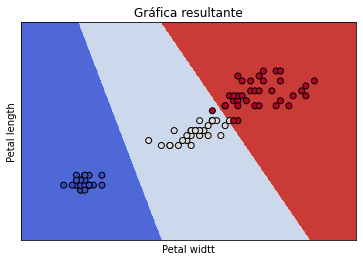

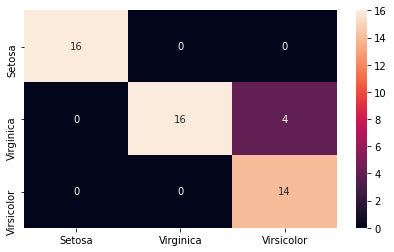

In [3]:
iris = datasets.load_iris()
sampleDf  = sample(range(0,150),100)
sampleDf2 = [i for i in range(0,150) if i not in sampleDf]

data = iris.data[:, 2:4]; X = data[sampleDf]; y = iris.target[sampleDf]; 

XTest = data[sampleDf2]; yTest = iris.target[sampleDf2]

svc = svm.SVC(kernel='linear', C=0.1).fit(X, y)
plot_model(X,y,svc)
irisPredictions = svc.predict(XTest)
confusion_matrix_plot(yTest,irisPredictions)

## Afinar el modelo:

In [4]:
grid = tune_function(X,y,'linear');

Los mejores parámetros son: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
El modelo queda con los parámetros: SVC(C=1, gamma=1, kernel='linear')


In [5]:
grid_predictions = grid['model'].predict(XTest)
print('Reporte modelo sin afinar:')
print(classification_report(yTest, svc.predict(XTest)))
print('Reporte modelo afinado:')
print(classification_report(yTest, grid_predictions))

Reporte modelo sin afinar:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89        20
           2       0.78      1.00      0.88        14

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.92        50
weighted avg       0.94      0.92      0.92        50

Reporte modelo afinado:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.85      0.92        20
           2       0.82      1.00      0.90        14

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50



## Otros modelos contenidos en la clase SVM:

### Radial basis function:

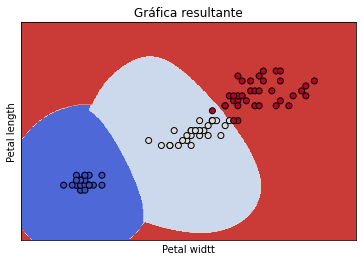

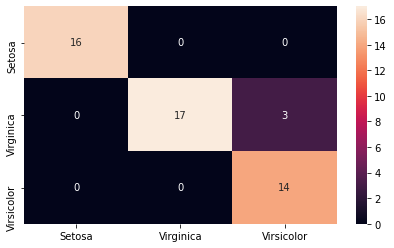

In [6]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X, y)
plot_model(X,y,rbf_svc)
irisPredictions = rbf_svc.predict(XTest)
confusion_matrix_plot(yTest,irisPredictions)

In [7]:
grid = tune_function(X,y,'rbf');

Los mejores parámetros son: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
El modelo queda con los parámetros: SVC(C=0.1, gamma=1)


In [8]:
grid_predictions = grid['model'].predict(XTest)
print('Reporte modelo sin afinar:')
print(classification_report(yTest, rbf_svc.predict(XTest)))
print('Reporte modelo afinado:')
print(classification_report(yTest, grid_predictions))

Reporte modelo sin afinar:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.85      0.92        20
           2       0.82      1.00      0.90        14

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50

Reporte modelo afinado:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89        20
           2       0.78      1.00      0.88        14

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.92        50
weighted avg       0.94      0.92      0.92        50



## Polynomial kernel:

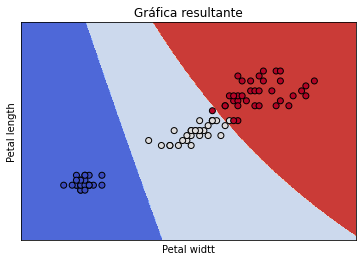

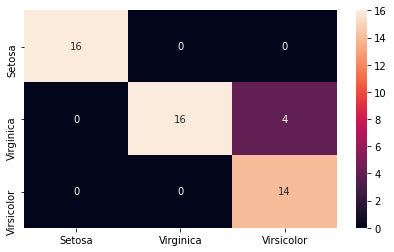

In [9]:
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X, y)
plot_model(X,y,poly_svc)
irisPredictions = poly_svc.predict(XTest)
confusion_matrix_plot(yTest,irisPredictions)

In [10]:
grid = tune_function(X,y,'poly');

Los mejores parámetros son: {'C': 0.001, 'gamma': 1, 'kernel': 'poly'}
El modelo queda con los parámetros: SVC(C=0.001, gamma=1, kernel='poly')


In [11]:
grid_predictions = grid['model'].predict(XTest)
print('Reporte modelo sin afinar:')
print(classification_report(yTest, poly_svc.predict(XTest)))
print('Reporte modelo afinado:')
print(classification_report(yTest, grid_predictions))

Reporte modelo sin afinar:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89        20
           2       0.78      1.00      0.88        14

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.92        50
weighted avg       0.94      0.92      0.92        50

Reporte modelo afinado:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89        20
           2       0.78      1.00      0.88        14

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.92        50
weighted avg       0.94      0.92      0.92        50



### Linear Support Vector Classification:

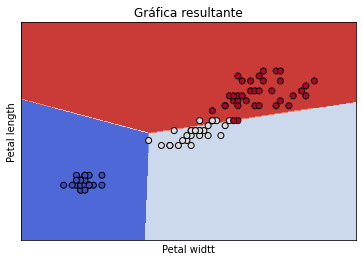

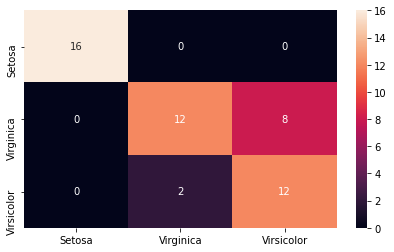

In [12]:
lin_svc = svm.LinearSVC().fit(X, y)
plot_model(X,y,lin_svc)
irisPredictions = lin_svc.predict(XTest)
confusion_matrix_plot(yTest,irisPredictions)